In [1]:
import numpy as np
import matplotlib.pyplot as plt
import axion_motion
import model
import transport_equation
from common import util, constants
from common.rh_neutrino import calc_Gamma_a_SU2

In [2]:
m_a_range = np.geomspace(1e6, 1e9, 11)
Gamma_phi_range = np.geomspace(1e6, 1e9, 10)
H_inf = 2e10

In [3]:
def make_model(m_a, Gamma_phi):
    return model.AxionBaryogenesisModel(
        source_vector=transport_equation.source_vector_weak_sphaleron, 
        axion_rhs=axion_motion.axion_rhs_simple, calc_axion_mass=axion_motion.calc_const_axion_mass, 
        axion_initial=(1, 0), axion_parameter=(m_a,), Gamma_phi=Gamma_phi, H_inf=H_inf)

In [4]:
ms = [[make_model(m_a, Gamma_phi) for m_a in m_a_range] for Gamma_phi in Gamma_phi_range]

In [5]:
%%time 
finals = [[model.solve(m) for m in row] for row in ms]

CPU times: user 6min 22s, sys: 46.5 ms, total: 6min 23s
Wall time: 6min 23s


In [6]:
def calc_space(f_a):
    return [[model.compute_final_asymmetry(ms[i][j], *finals[i][j], calc_Gamma_a_SU2(ms[i][j].axion_parameter[0], f_a), f_a)
     for j in range(len(m_a_range))] for i in range(len(Gamma_phi_range))]

In [7]:
def plot(f_a):
    eta_B = calc_space(f_a)
    levels = np.hstack([np.arange(np.floor(np.log10(np.min(eta_B))), np.ceil(np.log10(np.max(eta_B))), 0.5), 
                        np.log10(constants.eta_B_observed)])
    levels.sort()

    CS = plt.contour(m_a_range, Gamma_phi_range, np.log10(eta_B), levels, linewidths=2)
    plt.colorbar().set_label(r"$\log_{10} (\eta_B^0)$", fontsize=15)
    CS.collections[np.where(CS.levels == np.log10(constants.eta_B_observed))[0][0]].set_color("red")

    plt.title(r"$f_a = %s \, \mathrm{GeV}, H_\mathrm{inf} = %s \, \mathrm{GeV}$" % 
              (util.latex_exponential_notation(f_a), util.latex_exponential_notation(H_inf)), fontsize=15)
    plt.xscale("log"); plt.yscale("log")
    plt.xlabel("$m_a$ / GeV", fontsize=15)
    plt.ylabel(r"$\Gamma_\phi$ / GeV", fontsize=15)
    h1, _ = CS.legend_elements()
    plt.legend([h1[0]], [r"Transport Eq. $a W \tilde{W}$", "Boltzmann Eq. $a \partial J_L$"], 
               framealpha=1.0, loc=4, fontsize=12)

    plt.tight_layout()
    #plt.savefig(util.make_plot_path("transport_vs_boltzmann.pdf"))
    plt.show()

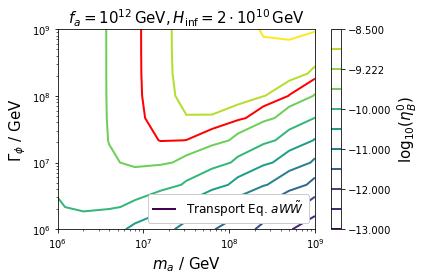

In [9]:
plot(1e12)